<a href="https://colab.research.google.com/github/rreghunandan/Energy-Efficiency-Prediction-of-Buildng/blob/main/Energy_Efficiency_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library and Dataset**

In [74]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('/content/ENB2012_data.xlsx - Φύλλο1.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.00,343.00,220.50,3.50,5,0.40,5,17.88,21.40
764,0.62,808.50,367.50,220.50,3.50,2,0.40,5,16.54,16.88
765,0.62,808.50,367.50,220.50,3.50,3,0.40,5,16.44,17.11
766,0.62,808.50,367.50,220.50,3.50,4,0.40,5,16.48,16.61


## **COLUMNS**


1.   X1 Relative Compactness
2.   X2 Surface Area
3.   X3 Wall Area
4.    X4 Roof Area
5     X5 Overall Height
6.     X6 Orientation
7     X7 Glazing Area
8.   X8 Glazing Area Distribution;
9.   y1 Heating Load (target);
10.  y2 Cooling Load (target);










Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters

In [76]:
columns = ['Relative Compactness(X1)','Surface Area(X2)','Wall Area(X3)','Roof Area(X4)','Overall Height(X5)','Orientation(X6)','Glazing Area(X7)','Glazing Area Distribution(X8)','Heating Load(y1)','Cooling Load(y2)']
df.columns = columns


In [77]:
df.head()

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8),Heating Load(y1),Cooling Load(y2)
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Relative Compactness(X1)       768 non-null    float64
 1   Surface Area(X2)               768 non-null    float64
 2   Wall Area(X3)                  768 non-null    float64
 3   Roof Area(X4)                  768 non-null    float64
 4   Overall Height(X5)             768 non-null    float64
 5   Orientation(X6)                768 non-null    int64  
 6   Glazing Area(X7)               768 non-null    float64
 7   Glazing Area Distribution(X8)  768 non-null    int64  
 8   Heating Load(y1)               768 non-null    float64
 9   Cooling Load(y2)               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness(X1),768.00,0.76,0.11,0.62,0.68,0.75,0.83,0.98
Surface Area(X2),768.00,671.71,88.09,514.50,606.38,673.75,741.12,808.50
Wall Area(X3),768.00,318.50,43.63,245.00,294.00,318.50,343.00,416.50
Roof Area(X4),768.00,176.60,45.17,110.25,140.88,183.75,220.50,220.50
Overall Height(X5),768.00,5.25,1.75,3.50,3.50,5.25,7.00,7.00
Orientation(X6),768.00,3.50,1.12,2.00,2.75,3.50,4.25,5.00
Glazing Area(X7),768.00,0.23,0.13,0.00,0.10,0.25,0.40,0.40
Glazing Area Distribution(X8),768.00,2.81,1.55,0.00,1.75,3.00,4.00,5.00
Heating Load(y1),768.00,22.31,10.09,6.01,12.99,18.95,31.67,43.10
Cooling Load(y2),768.00,24.59,9.51,10.90,15.62,22.08,33.13,48.03


In [80]:
df.isnull().sum()

Relative Compactness(X1)         0
Surface Area(X2)                 0
Wall Area(X3)                    0
Roof Area(X4)                    0
Overall Height(X5)               0
Orientation(X6)                  0
Glazing Area(X7)                 0
Glazing Area Distribution(X8)    0
Heating Load(y1)                 0
Cooling Load(y2)                 0
dtype: int64

# **EDA**

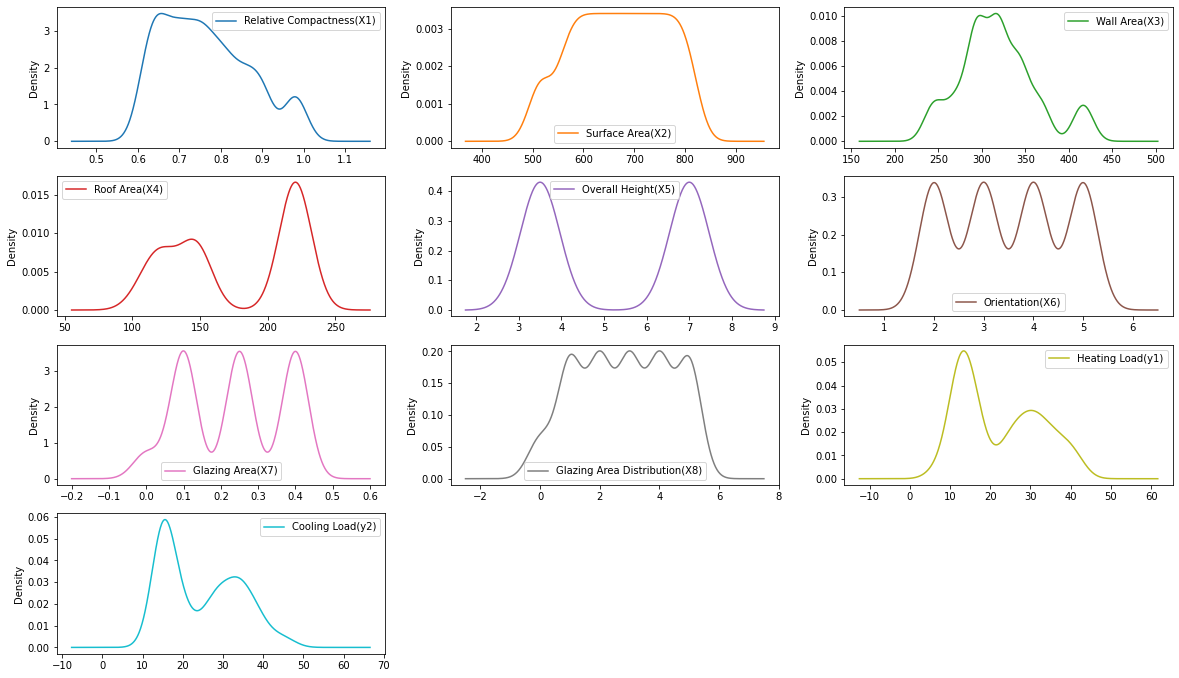

In [81]:
df.plot(kind='density', subplots=True, layout=(5,3), figsize=(20, 15), sharex=False)
plt.show()

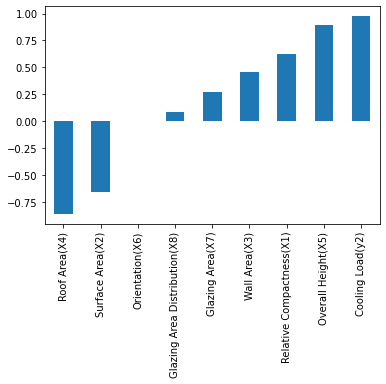

In [82]:
df.corr()['Heating Load(y1)'].sort_values()[:-1].plot.bar()



*   This correlation plot shows that y1 and y2 which are heating load and cooling load are almost perfectly correlated. This was expected.
*X4 and X5 are also highly correlated with Y1, so they are also correlated with Y2. These are roof area and overall height. This is also expected beacuse they both increase the volume of the house which makes it harder to heat or cool.
*Lastly X1, X2 and X3 are corelated to y1 (y2, too). These are relative compactness, surface area and wall area. These are also expected.
*However X6 and X8 have almost 0 correlation. These values are orientation and glazing area distribution. This also makes sense because these values are irrelevant.



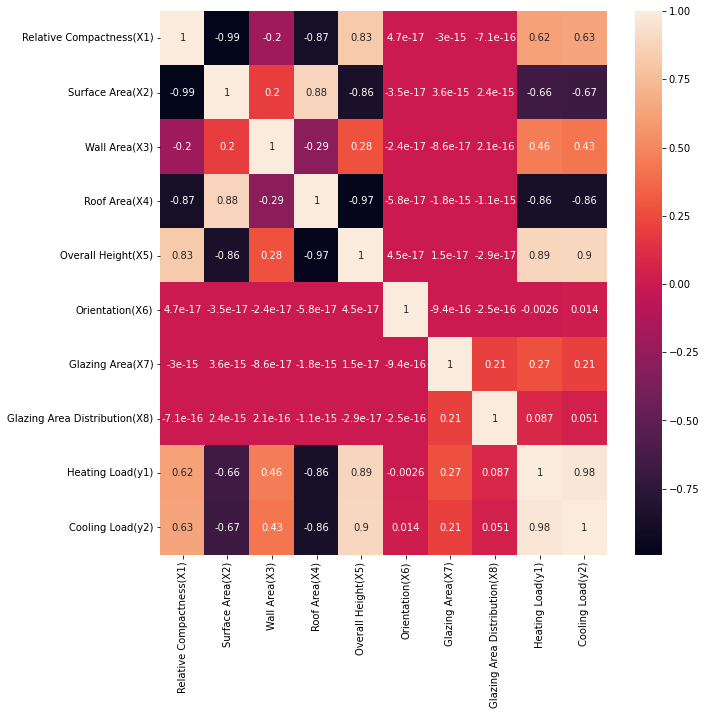

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [84]:
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
df.corr()

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8),Heating Load(y1),Cooling Load(y2)
Relative Compactness(X1),1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface Area(X2),-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall Area(X3),-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof Area(X4),-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall Height(X5),0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation(X6),0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing Area(X7),-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
Glazing Area Distribution(X8),-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating Load(y1),0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling Load(y2),0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00



The tables shows that there is a strong correlation between targets. We cannot exclude one of those, because heating load and cooling are equally important outputs to be predicted.

Each feature has different scale, as we can see the minimum and maximum values for each of variables. To obtain a better scale, it is good to normalize the data because it makes distributions better.

# **Noramlizing dataset**

In [85]:
df = (df-np.min(df)) / (np.max(df) - np.min(df))
df .head(5)

,Relative Compactness(X1),Surface Area(X2),Wall Area(X3),Roof Area(X4),Overall Height(X5),Orientation(X6),Glazing Area(X7),Glazing Area Distribution(X8),Heating Load(y1),Cooling Load(y2)
0,1.00,0.00,0.29,0.00,1.00,0.00,0.00,0.00,0.26,0.28
1,1.00,0.00,0.29,0.00,1.00,0.33,0.00,0.00,0.26,0.28
2,1.00,0.00,0.29,0.00,1.00,0.67,0.00,0.00,0.26,0.28
3,1.00,0.00,0.29,0.00,1.00,1.00,0.00,0.00,0.26,0.28
4,0.78,0.17,0.43,0.11,1.00,0.00,0.00,0.00,0.40,0.47


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness(X1),768.00,0.40,0.29,0.00,0.17,0.36,0.58,1.00
Surface Area(X2),768.00,0.53,0.30,0.00,0.31,0.54,0.77,1.00
Wall Area(X3),768.00,0.43,0.25,0.00,0.29,0.43,0.57,1.00
Roof Area(X4),768.00,0.60,0.41,0.00,0.28,0.67,1.00,1.00
Overall Height(X5),768.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
Orientation(X6),768.00,0.50,0.37,0.00,0.25,0.50,0.75,1.00
Glazing Area(X7),768.00,0.59,0.33,0.00,0.25,0.62,1.00,1.00
Glazing Area Distribution(X8),768.00,0.56,0.31,0.00,0.35,0.60,0.80,1.00
Heating Load(y1),768.00,0.44,0.27,0.00,0.19,0.35,0.69,1.00
Cooling Load(y2),768.00,0.37,0.26,0.00,0.13,0.30,0.60,1.00


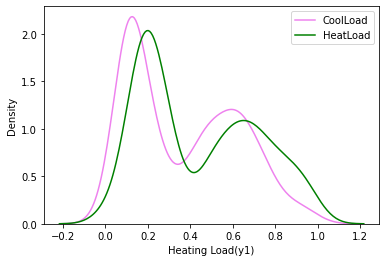

In [87]:
sns.distplot(df['Cooling Load(y2)'],hist=False,color="Violet",label="CoolLoad")
sns.distplot(df['Heating Load(y1)'],hist=False,color="Green",label="HeatLoad")
plt.legend()
plt.show()

heating load and cooling load are highly correlated

# **MODELLING**

In [88]:
X = df.drop(["Heating Load(y1)","Cooling Load(y2)"],axis=1)
y1 = df['Heating Load(y1)']
y2 = df['Cooling Load(y2)']

In [89]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

**HEATING LOAD PREDICTION**

In [90]:
htmodel = []
htscore = []

In [91]:
dtr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X, y1, cv=5)
print(np.mean(scores))
htmodel.append('Descision Tree')
htscore.append(np.mean(scores))

0.9643369031163145


In [92]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X, y1, cv=5)
print(np.mean(scores))
htmodel.append('Random Forest')
htscore.append(np.mean(scores))

0.9651397586476245


In [93]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y1,test_size = 0.3, random_state = 123)
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_r.fit(train_X, train_y)
pred = xgb_r.predict(test_X)
scores = r2_score(test_y,pred)
print(scores)
htmodel.append('Xgboost')
htscore.append(scores)

0.8307395838412795


COOLING LOAD PREDICTION

In [94]:
clmodel = []
clscore = []

In [95]:
dtr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X, y2, cv=5)
print(np.mean(scores))
clmodel.append('Descision Tree')
clscore.append(np.mean(scores))

0.9382669574228564


In [96]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X, y2, cv=5)
print(np.mean(scores))
clmodel.append('Random Forest')
clscore.append(np.mean(scores))

0.957889421072022


In [97]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y2,test_size = 0.3, random_state = 123)
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_r.fit(train_X, train_y)
pred = xgb_r.predict(test_X)
scores = r2_score(test_y,pred)
print(scores)
clmodel.append('Xgboost')
clscore.append(scores)

0.773936604497294


# **Heating & Cooling Scores Table**

In [98]:
from tabulate import tabulate
table = [['Model','Score']]
for i in range(len(htmodel)):
    table.append([htmodel[i],htscore[i]])
print('Heating Load Prediction Score')
print(tabulate(table,headers='firstrow',tablefmt='grid'))

Heating Load Prediction Score
+----------------+----------+
| Model          |    Score |
+================+==========+
| Descision Tree | 0.964337 |
+----------------+----------+
| Random Forest  | 0.96514  |
+----------------+----------+
| Xgboost        | 0.83074  |
+----------------+----------+


In [99]:
from tabulate import tabulate
table = [['Model','Score']]
for i in range(len(clmodel)):
    table.append([clmodel[i],clscore[i]])
print('Cooling Load Prediction Score')
print(tabulate(table,headers='firstrow',tablefmt='grid'))

Cooling Load Prediction Score
+----------------+----------+
| Model          |    Score |
+================+==========+
| Descision Tree | 0.938267 |
+----------------+----------+
| Random Forest  | 0.957889 |
+----------------+----------+
| Xgboost        | 0.773937 |
+----------------+----------+
